<a href="https://colab.research.google.com/github/senakrgli/lego-analysis-colab/blob/master/Lego_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson.

<img src="https://i.imgur.com/49FNOHj.jpg">

# Import Statements

In [ ]:
import pandas as pd

In [ ]:
!ls -l colors.csv

-rw-r--r-- 1 root root 3672 Feb 10 12:36 colors.csv


# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [ ]:
df = pd.read_csv("colors.csv")

In [ ]:
df.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [ ]:
df["name"].unique()

array(['Unknown', 'Black', 'Blue', 'Green', 'Dark Turquoise', 'Red',
       'Dark Pink', 'Brown', 'Light Gray', 'Dark Gray', 'Light Blue',
       'Bright Green', 'Light Turquoise', 'Salmon', 'Pink', 'Yellow',
       'White', 'Light Green', 'Light Yellow', 'Tan', 'Light Violet',
       'Glow In Dark Opaque', 'Purple', 'Dark Blue-Violet', 'Orange',
       'Magenta', 'Lime', 'Dark Tan', 'Bright Pink', 'Medium Lavender',
       'Lavender', 'Trans-Black IR Lens', 'Trans-Dark Blue',
       'Trans-Green', 'Trans-Bright Green', 'Trans-Red', 'Trans-Black',
       'Trans-Light Blue', 'Trans-Neon Green', 'Trans-Very Lt Blue',
       'Trans-Dark Pink', 'Trans-Yellow', 'Trans-Clear', 'Trans-Purple',
       'Trans-Neon Yellow', 'Trans-Neon Orange', 'Chrome Antique Brass',
       'Chrome Blue', 'Chrome Green', 'Chrome Pink', 'Chrome Black',
       'Very Light Orange', 'Light Purple', 'Reddish Brown',
       'Light Bluish Gray', 'Dark Bluish Gray', 'Medium Blue',
       'Medium Green', 'Speckle Black-

In [ ]:
df["name"].nunique()

135

**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [ ]:
df.groupby("is_trans").count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [ ]:
df["is_trans"].value_counts()

f    107
t     28
Name: is_trans, dtype: int64

In [ ]:
f_sayisi = (df[df['is_trans'] == 'f']).shape[0]
print(f_sayisi)

107


In [ ]:
t_sayisi = (df[df['is_trans'] == 't']).shape[0]
print(t_sayisi)

28


**Challenge**: Change this into an h3 section heading: Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

**Challenge**: Display this image: https://i.imgur.com/aKcwkSx.png

<img src="https://imgur.com/aKcwkSx.jpg">




A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

**Challenge**: Display this image https://i.imgur.com/whB1olq.png

<img src="https://imgur.com/whB1olq.jpg">


The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows.

In [ ]:
df_sets=pd.read_csv("sets.csv")

In [ ]:
df_sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965.0,1.0,43.0
1,0011-2,Town Mini-Figures,1978.0,84.0,12.0
2,0011-3,Castle 2 for 1 Bonus Offer,1987.0,199.0,0.0
3,0012-1,Space Mini-Figures,1979.0,143.0,12.0
4,0013-1,Space Mini-Figures,1979.0,143.0,12.0


In [ ]:
df_sets.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996.0,476.0,0.0
15706,XMASTREE-1,Christmas Tree,2019.0,410.0,26.0
15707,XWING-1,Mini X-Wing Fighter,2019.0,158.0,60.0
15708,XWING-2,X-Wing Trench Run,2019.0,158.0,52.0
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013.0,158.0,413.0


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [ ]:
df_sets.sort_values("year")
df_sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965.0,1.0,43.0
1,0011-2,Town Mini-Figures,1978.0,84.0,12.0
2,0011-3,Castle 2 for 1 Bonus Offer,1987.0,199.0,0.0
3,0012-1,Space Mini-Figures,1979.0,143.0,12.0
4,0013-1,Space Mini-Figures,1979.0,143.0,12.0


**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [ ]:
df_sets[df_sets["year"] == 1965].shape[0]

13

**Challenge**: Find the top 5 LEGO sets with the most number of parts.

In [ ]:
df_sets.sort_values("num_parts", ascending=False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015.0,571.0,9987.0
11183,75192-1,UCS Millennium Falcon,2017.0,171.0,7541.0
10551,71043-1,Hogwarts Castle,2018.0,246.0,6020.0
295,10256-1,Taj Mahal,2017.0,673.0,5923.0
221,10189-1,Taj Mahal,2008.0,673.0,5922.0


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019?

In [ ]:
sets_by_year = df_sets.groupby('year').count()

In [ ]:
df_sets.groupby('year').count().tail()

,set_num,name,theme_id,num_parts
year,,,,
2017.0,783,783,783,783
2018.0,809,809,809,809
2019.0,833,833,833,833
2020.0,664,664,664,664
2021.0,3,3,3,3


**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames.

In [ ]:
import matplotlib.pyplot as plt

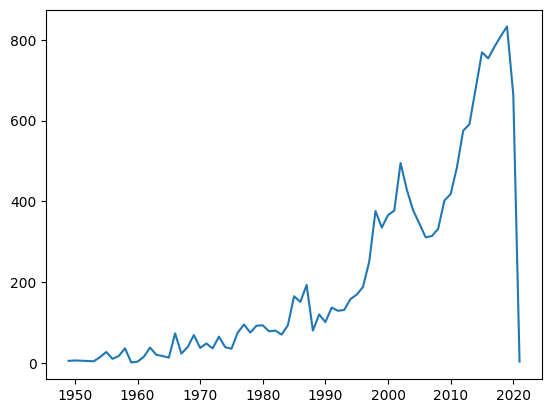

In [ ]:
plt.plot(sets_by_year.index, sets_by_year.set_num)

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [ ]:
pd.read_csv("themes.csv")

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0
...,...,...,...
591,705,Iron Man,696.0
592,706,Spider-Man,696.0
593,707,X-Men,696.0
594,708,The LEGO Batman Movie,697.0


In [ ]:
themes_by_year = df_sets.groupby("year").agg({"theme_id": pd.Series.nunique})
themes_by_year.rename(columns = {"theme_id":"nr_themes"}, inplace=True)
themes_by_year.head()

,nr_themes
year,
1949.0,2
1950.0,1
1953.0,2
1954.0,2
1955.0,4


**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021).

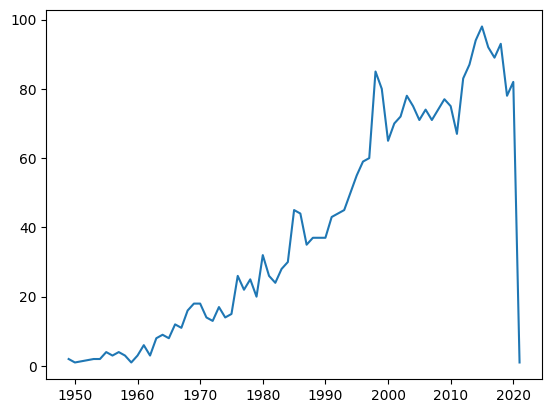

In [ ]:
plt.plot(themes_by_year.index, themes_by_year.nr_themes)

In [ ]:
#plt.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2]) ÇALIŞMIYOOOORRRRRRR

### Line Charts with Two Seperate Axes

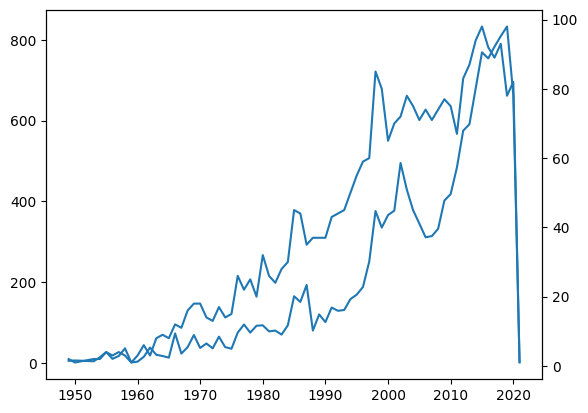

In [ ]:
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(sets_by_year.index, sets_by_year.set_num)
ax2.plot(themes_by_year.index, themes_by_year.nr_themes)

çalışmıyoooooooooo
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_xlabel="green"
ax1.set_ylabel=('Number Of Sets', color='green')
ax2.set_ylabel=('Number Of Themes', color='blue')
ax1.plot(sets_by_year.index, sets_by_year.set_num, color="g")
ax2.plot(themes_by_year.index, themes_by_year.nr_themes, color="b")

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

Set başına ortalama parça sayısını bulmak için .groupby() ve .agg() fonksiyonlarını birlikte kullanın. 1954'te piyasaya sürülen ortalama LEGO seti, diyelim ki 2017'ye kıyasla kaç parçadan oluşuyordu?

In [ ]:
df_sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965.0,1.0,43.0
1,0011-2,Town Mini-Figures,1978.0,84.0,12.0
2,0011-3,Castle 2 for 1 Bonus Offer,1987.0,199.0,0.0
3,0012-1,Space Mini-Figures,1979.0,143.0,12.0
4,0013-1,Space Mini-Figures,1979.0,143.0,12.0


In [ ]:
parts_per_set = df_sets.groupby("year").agg({"num_parts":pd.Series.mean})
parts_per_set.head()

,num_parts
year,
1949.0,99.600000
1950.0,1.000000
1953.0,13.500000
1954.0,12.357143
1955.0,37.925926


### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart?

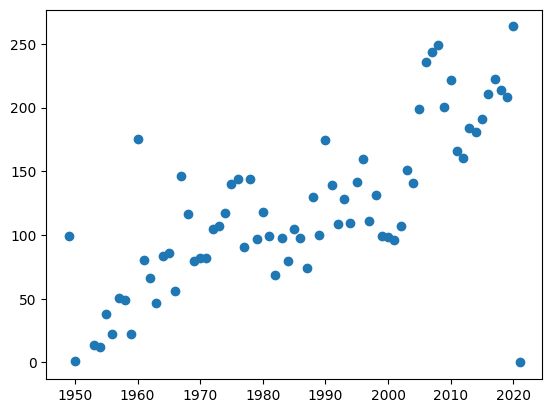

In [ ]:
plt.scatter(parts_per_set.index, parts_per_set.num_parts)

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets?

İlk 5 satıra baktığımızda sütun adlarını görürüz. id sütunundaki her değer benzersizdir (bu, themes tablosunun birincil anahtarıdır). Tema adları benzersiz değildir. "Star Wars" ismini aratırsak, bu isme karşılık gelen 4 farklı id olduğunu görürüz.

**Challenge** Use what you know about HTML markup and tags to display the database schema: https://i.imgur.com/Sg4lcjx.png

<img src= https://i.imgur.com/Sg4lcjx.png>

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv.

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

themes.csv dosyasını keşfedin. Nasıl yapılandırılmış? 'Star Wars' adını arayın. themes.csv dosyasında bu isme karşılık gelen kaç kimlik var? Şimdi bu kimlikleri kullanın ve sets.csv'de karşılık gelen setleri bulun (İpucu: theme_id sütununda eşleşmeleri aramanız gerekecek)


In [ ]:
themes = pd.read_csv("themes.csv")
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [ ]:
themes[themes.name == 'Star Wars']

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [ ]:
themes[themes.name == 'Star Wars'].shape

(4, 3)

In [ ]:
df_sets[df_sets.theme_id == 18]

,set_num,name,year,theme_id,num_parts
8786,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002.0,18.0,1.0
12051,8000-1,Pit Droid,2000.0,18.0,223.0
12058,8001-1,Battle Droid,2000.0,18.0,336.0
12066,8002-1,Destroyer Droid,2000.0,18.0,567.0
12071,8007-1,C-3PO,2001.0,18.0,339.0
12072,8008-1,Stormtrooper,2001.0,18.0,360.0
12073,8009-1,R2-D2,2002.0,18.0,239.0
12074,8010-1,Darth Vader,2002.0,18.0,388.0
12081,8011-1,Jango Fett,2002.0,18.0,425.0
12083,8012-1,Super Battle Droid,2002.0,18.0,378.0


In [ ]:
df_sets[df_sets.theme_id == 209]

,set_num,name,year,theme_id,num_parts
11013,75023-1,Star Wars Advent Calendar 2013,2013.0,209.0,254.0
11046,75056-1,Star Wars Advent Calendar 2014,2014.0,209.0,273.0
11080,75097-1,Star Wars Advent Calendar 2015,2015.0,209.0,291.0
11131,75146-1,Star Wars Advent Calendar 2016,2016.0,209.0,282.0
11173,75184-1,Star Wars Advent Calendar 2017,2017.0,209.0,309.0
11206,75213-1,Star Wars Advent Calendar 2018,2018.0,209.0,307.0
11245,75245-1,Star Wars Advent Calendar 2019,2019.0,209.0,280.0
11281,75279-1,Star Wars Advent Calendar 2020,2020.0,209.0,312.0
12019,7958-1,Star Wars Advent Calendar 2011,2011.0,209.0,267.0
14352,9509-1,Star Wars Advent Calendar 2012,2012.0,209.0,235.0


### Merging (i.e., Combining) DataFrames based on a Key


In [ ]:
set_theme_count = df_sets["theme_id"].value_counts()

In [ ]:
set_theme_count = pd.DataFrame({"id": set_theme_count.index, "set_count":set_theme_count.values})

In [ ]:
set_theme_count.head()

,id,set_count
0,158.0,734
1,501.0,629
2,494.0,396
3,435.0,356
4,503.0,329


In [ ]:
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [ ]:
merged_df = pd.merge(set_theme_count, themes, on='id')
merged_df[:3]

,id,set_count,name,parent_id
0,158.0,734,Star Wars,NaN
1,501.0,629,Gear,NaN
2,494.0,396,Friends,NaN


<BarContainer object of 10 artists>

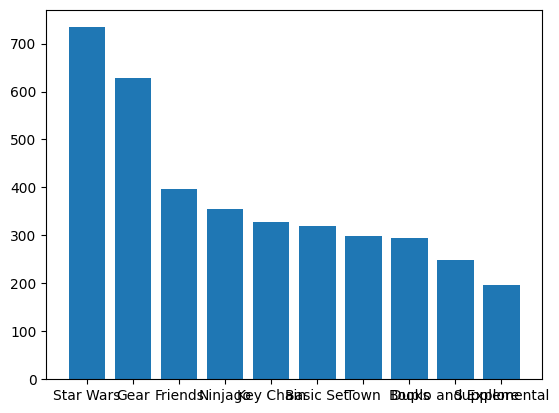

In [ ]:
plt.bar(merged_df.name[:10], merged_df.set_count[:10])

<BarContainer object of 10 artists>

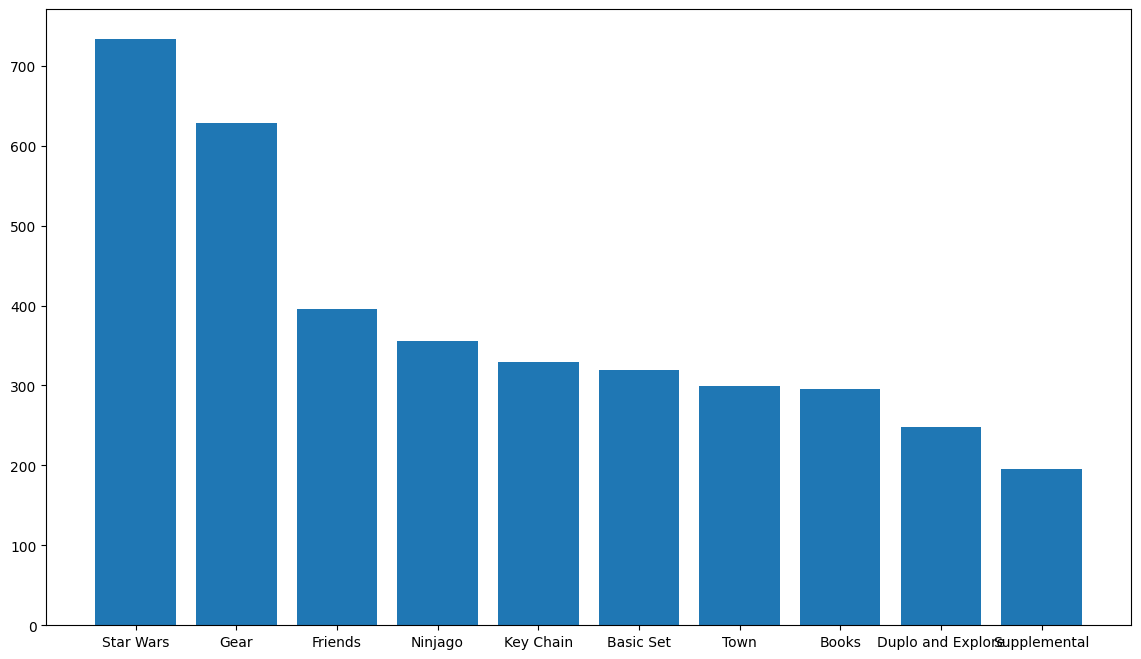

In [ ]:
plt.figure(figsize=(14,8))
plt.bar(merged_df.name[:10], merged_df.set_count[:10])

<BarContainer object of 10 artists>

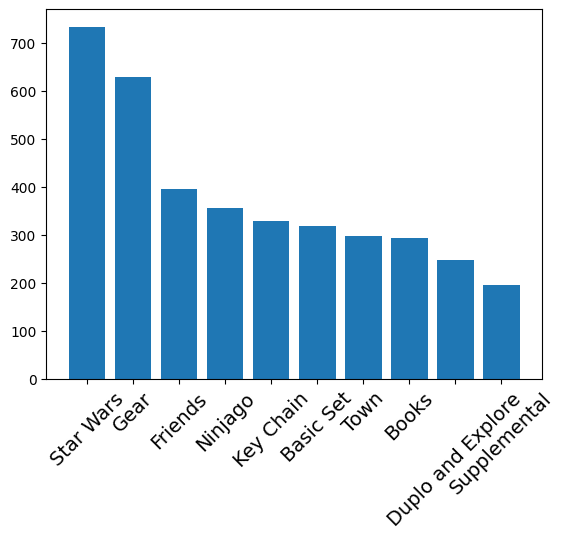

In [ ]:
plt.xticks(fontsize=14, rotation=45)
plt.bar(merged_df.name[:10], merged_df.set_count[:10])

<BarContainer object of 10 artists>

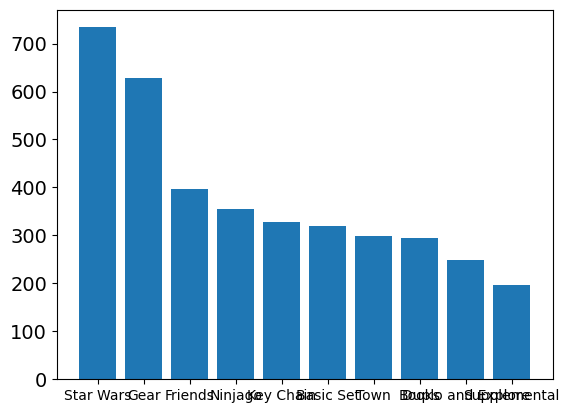

In [ ]:
plt.yticks(fontsize=14)
plt.bar(merged_df.name[:10], merged_df.set_count[:10])

<BarContainer object of 10 artists>

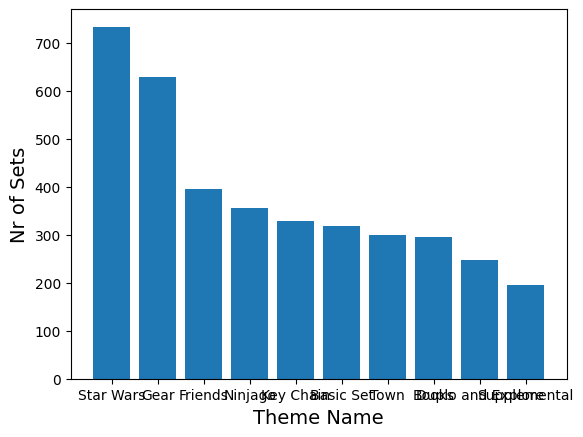

In [ ]:
plt.ylabel('Nr of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)

plt.bar(merged_df.name[:10], merged_df.set_count[:10])

<BarContainer object of 10 artists>

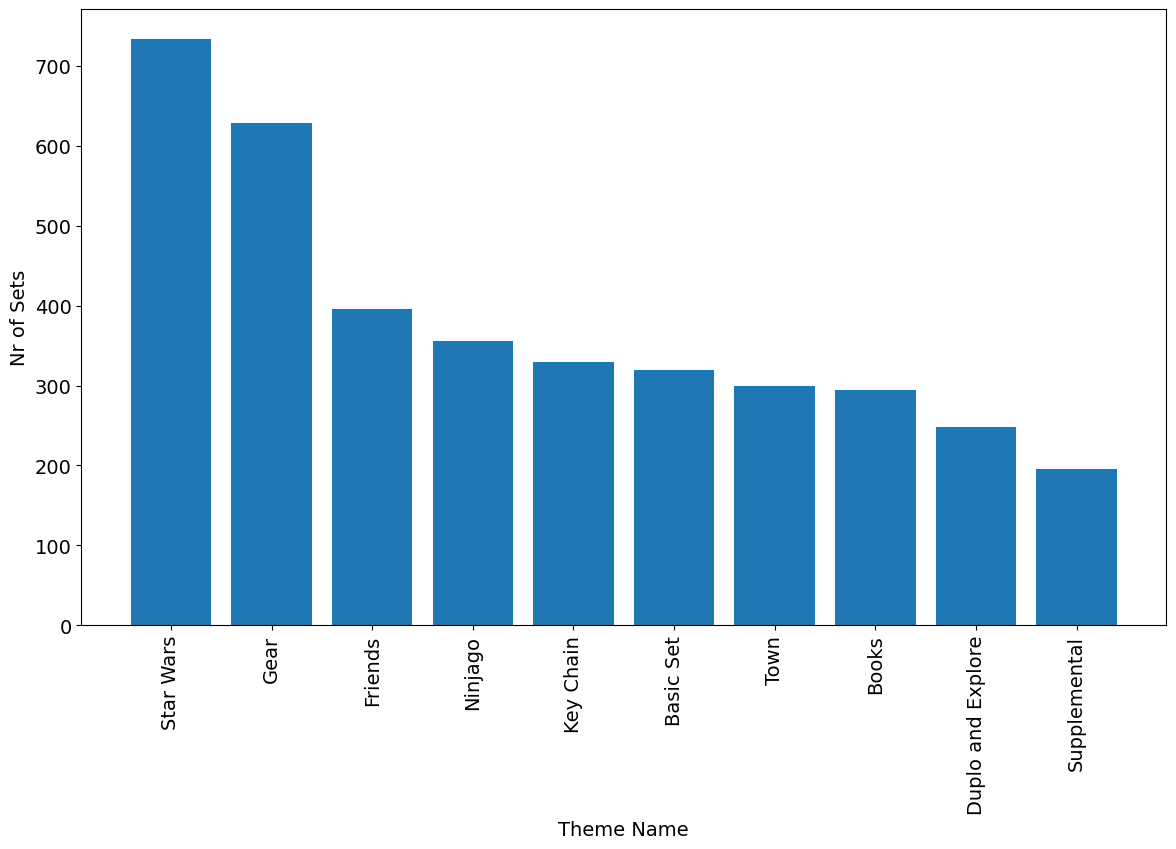

In [ ]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.ylabel('Nr of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)

plt.bar(merged_df.name[:10], merged_df.set_count[:10])

Peki burada ne görebiliyoruz? Star Wars, Town veya Ninjago gibi bu temalardan birkaçı LEGO denince benim aklıma gelenler. Bununla birlikte, LEGO aynı zamanda çok sayıda ... kitap ve anahtarlık da üretiyor gibi görünüyor?!?! Sanırım burada yaşımı gösteriyorum, ancak LEGO şirketinin bugünlerde sadece plastik tuğlalardan çok daha fazlasını üretiyor gibi görünmesi ilginç. 'Gear' kategorisinin kendisi çok büyük ve görünüşe göre çantalardan kalem kutularına kadar her şeyi içeriyor. LEGO ana işinden uzaklaştı mı yoksa başarılı bir şekilde çeşitleniyor mu? Buna veri setimizden cevap veremeyiz. Buna karar vermeyi bir işletme okulu vaka çalışmasına bırakacağım.